In [1]:
# Necessary imports
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Read in the data
train = pd.read_csv('../../data/final_train.csv')
test = pd.read_csv('../../data/final_test.csv')

X_train = train.drop(columns=['booking_status'])
y_train = train['booking_status']
X_test = test.drop(columns=['booking_status'])
y_test = test['booking_status']

# Comparison of how different models performance

## 1. Logistic Regression
Logistic regression will be used as a baseline model. We trained it on the whole training dataset, without any hyperparameter tuning.

In [2]:
# Loading the model
with open('../models/logistic_regression_baseline.pkl', 'rb') as f:
    log_reg = pickle.load(f)

Text(0.5, 1.0, 'Confusion Matrix, Logistic Regression Baseline')

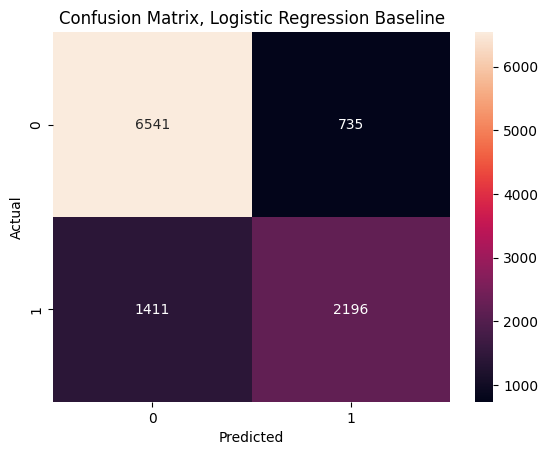

In [8]:
# Making predictions and evaluating the model
y_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix, Logistic Regression Baseline')

In [11]:
# Metrics on test and train data
print(f'Metrics on the test data:\n{classification_report(y_test, y_pred)}')
print(f'Metrics on the train data:\n{classification_report(y_train, y_train_pred)}')

Metrics on the test data:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7276
           1       0.75      0.61      0.67      3607

    accuracy                           0.80     10883
   macro avg       0.79      0.75      0.77     10883
weighted avg       0.80      0.80      0.80     10883

Metrics on the train data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17114
           1       0.73      0.62      0.67      8278

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392



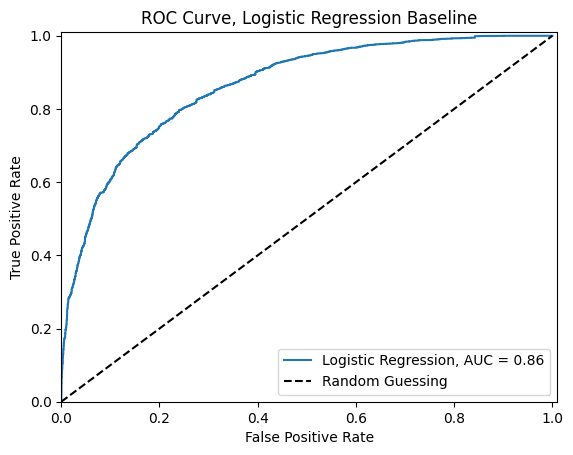

In [17]:
# ROC curve
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve, Logistic Regression Baseline')
plt.show()

Model's performance is not bad, but we will try to improve it by optimizing hyperparameters and using more advanced models. We will probably want our model to have high recall, because in our business case we want to detect as many cancellations as possible.